# Ch2_Overviev_of_Supervised_Learning

## 機器學習的種類
在機器學習的問題中，我們希望能透過適當的演算方法幫助我們進行客觀或自動的判斷，機器學習的方法可以分為兩大類：「監督式學習」與「非監督式學習」。

1. **監督式學習**：監督式學習的資料可以想成是一組 $(\bf{X},y)$ 的模式，其中包含我們搜集到的資料 $\bf{X}$ ，以及我們想要預測的結果 $y$ 。而 $y$ 也可以類別資料，此即所稱的分類問題(classification problems)。
2. **非監督式學習**：非監督式學習的資料只有 $\bf{X}$ ，我們希望透過這些資料來找出一個脈絡，如分群問題(clustering problems)。

換句話說，監督式學習的分析方法適於於存在「正確解答」的模式，我們可以透過建立「訓練集(training set)」以及「測試集(test set)」來比對訓練的優劣。

## 基本的預測方法
在 The Elements of Statistical Learning 中的 2.3 節介紹了兩種預測的方法，分別為：「線性迴歸預測」以及「KNN 演算法」。

### 資料集
在這個資料集的預測變數 $\bf{X}$ 有兩個變數，而被預測變數 $Y$ 有兩個分別為<span style="color:orange">**橘色**</span>與<span style="color:blue">**藍色**</span>。

我們定義：
$$\hat{G}=\left\{ \begin{matrix}
 {\color{Orange} orange} & , \hat{Y}>0.5\\ 
{\color{Blue} blue} & , \hat{Y} \leq 0.5
\end{matrix}\right.$$

並且從課本所附的資料集匯入資料：

In [ ]:
%load_ext rpy2.ipython #讓R可以被用


In [15]:
%%R # 啟用R

#Import data
load(url("https://hastie.su.domains/ElemStatLearn/datasets/ESL.mixture.rda"))

x <-  ESL.mixture$x
g <-  ESL.mixture$y
xnew <- ESL.mixture$xnew
#grid
px1 <- ESL.mixture$px1
px2 <- ESL.mixture$px2

### 最小平方法

最小平方法希望能找到一條直線(or hyperplane)來分出我們要的資料，可以將這條線寫成：
$$ \hat{Y}=X\hat{\beta} $$

因此，我們要找到對應的最佳係數估計 $\hat{\beta}$，其運算邏輯為要極小化**殘差平方和**(residual sum of squares)：

$$ RSS(\beta)= (y - X \beta)^T (y - X \beta)$$

我們可以得到以下結果：
$$\hat{\beta }= (X^TX)^{-1}X^Ty$$

在 R 中，我們可以很簡單地使用`lm()`函數來進行最小平方法的估計。

In [18]:
%%R
linear <- lm(g~x)
linear$coefficients

(Intercept)          x1          x2 
  0.3290614  -0.0226360   0.2495983 


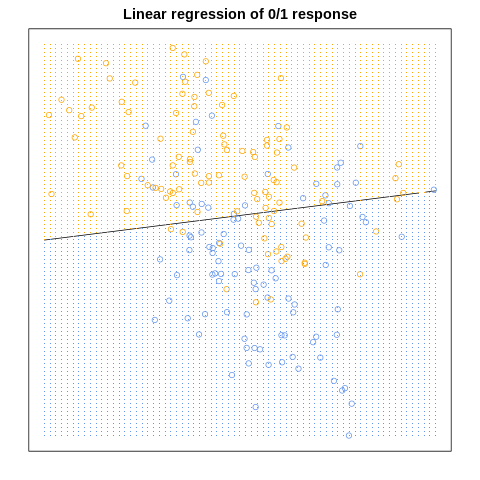

In [20]:
%%R
#計算期望機率
prob_linear <- linear$coefficients[1] +linear$coefficients[2] * xnew[,1] + linear$coefficients[3] * xnew[,2]
#fit grids
prob_lm <- matrix(prob_linear, length(px1), length(px2))

par(mar=rep(2,4)) #匡出圖片的範圍
contour(px1, px2, prob_lm, levels=0.5, labels="", xlab="", ylab="", main=
          "Linear regression of 0/1 response", axes=FALSE)
points(x, col=ifelse(g==1, "orange", "cornflowerblue"))
gd <- expand.grid(x=px1, y=px2)
points(gd, pch=".", cex=1.2, col=ifelse(prob_linear>0.5, "orange", "cornflowerblue"))
box()

### KNN 演算法

KNN(K Nearest Neighbors)演算法的觀念相當簡單，也就是找出各資料點最近的 $k$ 個資料點(k個鄰居)，並且進行投票，當藉此找出該點究竟是誰。

KNN的投票邏輯可以這樣表示：
$$  \hat{Y} (x)= \frac{1}{k}\sum_{x_i \in N_k(x)}^{}y_i  $$

1. 準備好你的樣本，決定一個整數 $k$ 
2. 決定與各樣本點最接近的 $k$ 個樣本點，距離可以有以下選擇：
  - 歐式距離(Euclidean distance)：$d(x,x_i)=\sqrt{(x-x_i)^T(x-x_i)}$
  - 曼哈頓距離(Manhattan distance)： $d(x,x_i)=\sum_1^j|x_j-x_{ij}|$
  - 明氏距離(Minkowski distance)：$d(x,x_i)=(\sum_{s=1}^j|x_j-x_{ij}|^p)^{\frac{1}{p}}$

3. 開始投票！看鄰居是哪種類的資料最多，則該資料點 $x$ 就會被分到該類別。
 
KNN 演算法也要注意儘量選擇**奇數**的$k$，藉此避免平手，而最適合的$k$可透過訓練集測試集的比對來找尋，也就是測試 k=1, k=2, ...。在高維度的資料中，KNN的表現也可能不好。



在 R 語言，我們需要使用`class`套件來呼叫`knn()`函式，即可進行KNN演算法的運算。

In [27]:
%%R
#KNN function
library(class) #Knn
#knn(train, test, cl, k = 1, l = 0, prob = FALSE, use.all = TRUE)
mod15 <- knn(x, xnew, g, k=15, prob=TRUE)

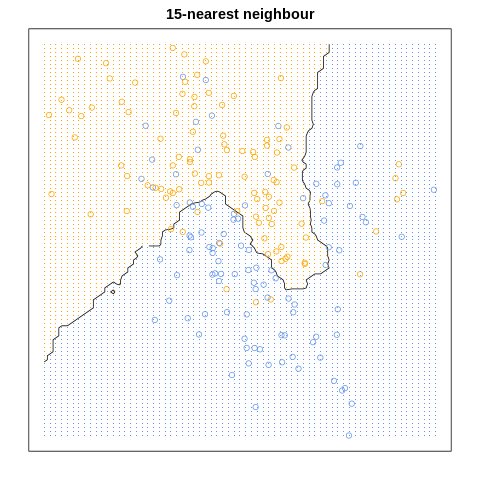

In [29]:
%%R
prob <- attr(mod15, "prob")
prob <- ifelse(mod15=="1", prob, 1-prob)
px1 <- ESL.mixture$px1
px2 <- ESL.mixture$px2
prob15 <- matrix(prob, length(px1), length(px2))
par(mar=rep(2,4))
contour(px1, px2, prob15, levels=0.5, labels="", xlab="", ylab="", main=
          "15-nearest neighbour", axes=FALSE)
points(x, col=ifelse(g==1, "orange", "cornflowerblue"))
gd <- expand.grid(x=px1, y=px2)
points(gd, pch=".", cex=1.2, col=ifelse(prob15>0.5, "orange", "cornflowerblue"))
box()

而我們也可來看看一個極端的例子，也就是當 $k=1$ 時，模仿上面的方法，我們可得到下圖：

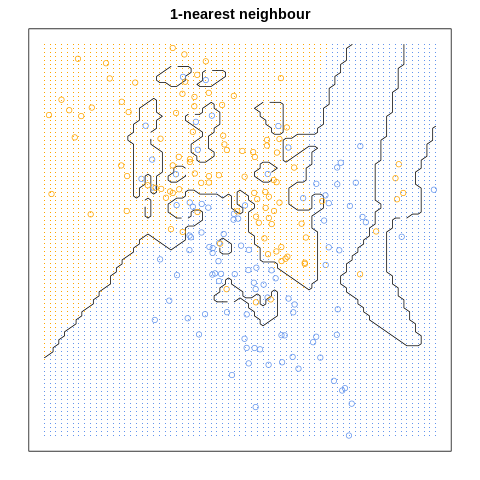

In [30]:
%%R
#1nn
mod1 <- knn(x, xnew, g, k=1, prob=TRUE)
prob <- attr(mod1, "prob")
prob <- ifelse(mod1=="1", prob, 1-prob)
px1 <- ESL.mixture$px1
px2 <- ESL.mixture$px2
prob1 <- matrix(prob, length(px1), length(px2))
par(mar=rep(2,4))
contour(px1, px2, prob1, levels=0.5, labels="", xlab="", ylab="", main=
          "1-nearest neighbour", axes=FALSE)
points(x, col=ifelse(g==1, "orange", "cornflowerblue"))
gd <- expand.grid(x=px1, y=px2)
points(gd, pch=".", cex=1.2, col=ifelse(prob15>0.5, "orange", "cornflowerblue"))
box()


我們可以統整 KNN 演算法為有 $N/k$ 個參數(parameters)，可以想成此分群共有 $N/k$ 個區域也就是如同要決定$N/k$中心點一般。

### Bayes Classifier
https://esl.hohoweiya.xyz/02-Overview-of-Supervised-Learning/2.4-Statistical-Decision-Theory/index.html

https://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf

https://blog.csdn.net/zejianli/article/details/53857581

